<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import metrics
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem 1: logistic regression binary classifier for positive diabetes**

Predictions:
 [0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0]
Confusion matrix:
 [[86 15]
 [25 28]]
Accuracy: 0.7402597402597403
Precision: 0.6511627906976745
Recall: 0.5283018867924528
F1 Score: 0.5833333333333333


Text(0.5, 427.9555555555555, 'Predicted label')

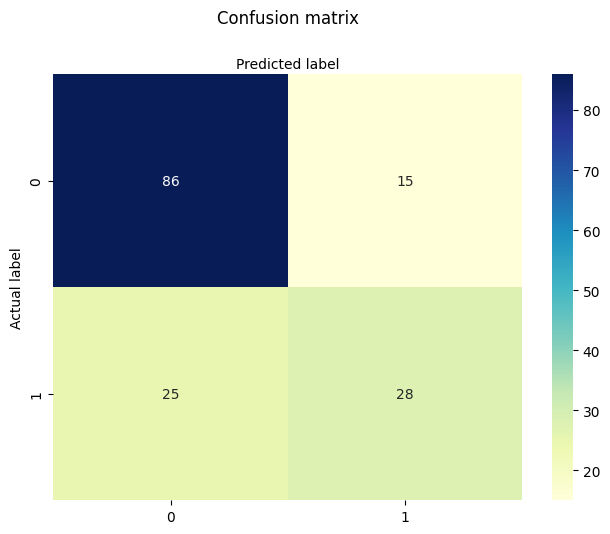

In [62]:
file_path = '/content/drive/MyDrive/Intro-to-ML/diabetes.csv'
diabetes = pd.read_csv(file_path)
# Check for null values
diabetes.isnull().sum()*100/diabetes.shape[0]

# Split training and test data
df_train, df_test = train_test_split(diabetes, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train_1 = df_train.pop('Outcome')
X_train_1 = df_train
y_val_1 = df_test.pop('Outcome')
X_val_1 = df_test

# Apply scaler() to all the columns
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_val_1 = scaler.fit_transform(X_val_1)

# Run logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_1, y_train_1)

# Make predictions
y_pred_1 = classifier.predict(X_val_1)
print("Predictions:\n", y_pred_1)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val_1, y_pred_1)
print("Confusion matrix:\n", cnf_matrix)

# Find accuracy, precision, recall and F1 score
precision = metrics.precision_score(y_val_1, y_pred_1)
recall = metrics.recall_score(y_val_1, y_pred_1)
print("Accuracy:", metrics.accuracy_score(y_val_1, y_pred_1))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", (2*precision*recall)/(precision+recall))

# Confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 2a: logistic regression model to classify the type of cancer**

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

Text(0.5, 427.9555555555555, 'Predicted label')

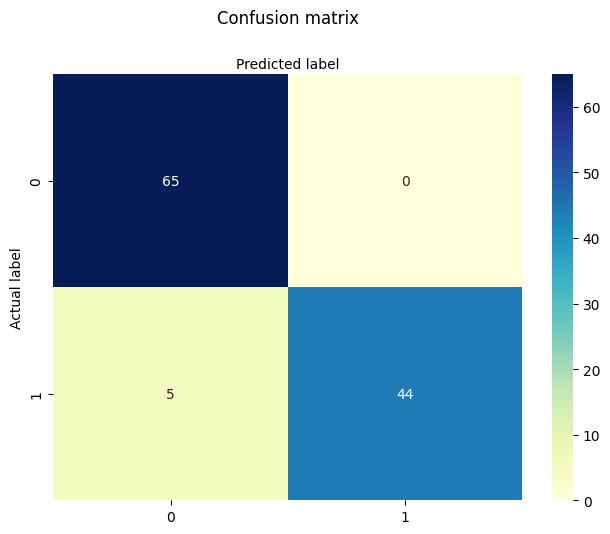

In [63]:
file_path = '/content/drive/MyDrive/Intro-to-ML/cancer.csv'
cancer = pd.read_csv(file_path)
# Check for null values
print(cancer.isnull().sum()*100/cancer.shape[0])
cancer = cancer.drop(columns=['Unnamed: 32', 'id'])
#print(cancer.isnull().sum()*100/cancer.shape[0])

# Split training and test data
df_train, df_test = train_test_split(cancer, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train_2 = df_train.pop('diagnosis')
X_train_2_orig = df_train
y_val_2 = df_test.pop('diagnosis')
X_val_2_orig = df_test

# Apply scaler() to all the columns
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2_orig)
X_val_2 = scaler.fit_transform(X_val_2_orig)

# Run logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_2, y_train_2)

# Make predictions
y_pred_2 = classifier.predict(X_val_2)
print("Predictions:\n", y_pred_2)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val_2, y_pred_2)
print("Confusion matrix:\n", cnf_matrix)

# Find accuracy, precision, recall and F1 score
precision = metrics.precision_score(y_val_2, y_pred_2, pos_label='M')
recall = metrics.recall_score(y_val_2, y_pred_2, pos_label='M')
print("Accuracy:", metrics.accuracy_score(y_val_2, y_pred_2))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", (2*precision*recall)/(precision+recall))

# Confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 2b: added weight penalty**

C: 10
Training accuracy: 0.9934065934065934
Test accuracy: 0.9473684210526315

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.978021978021978
Test accuracy: 0.9473684210526315

C: 0.001
Training accuracy: 0.6417582417582418
Test accuracy: 0.5701754385964912

Choose C = 10 

Predictions:
 ['M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B']
Confusion matrix:
 [[65  0]
 [ 6 43]]
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.8775510204081632
F1 Score: 0.9347826086956522


Text(0.5, 427.9555555555555, 'Predicted label')

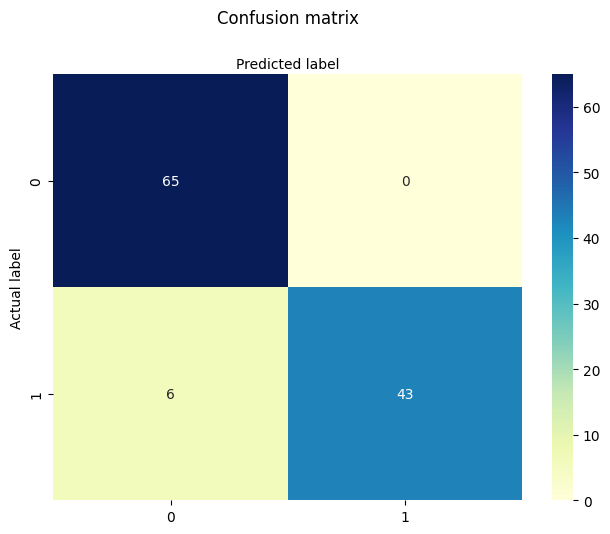

In [64]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(random_state=0, penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train_2, y_train_2)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_2, y_train_2))
    print('Test accuracy:', clf.score(X_val_2, y_val_2))
    print('')

print("Choose C = 10 \n")
# Run logistic regression with penalty
classifier = LogisticRegression(random_state=0, penalty='l1', C=10, solver='liblinear')
classifier.fit(X_train_2, y_train_2)

# Make predictions
y_pred_2 = classifier.predict(X_val_2)
print("Predictions:\n", y_pred_2)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val_2, y_pred_2)
print("Confusion matrix:\n", cnf_matrix)

# Find accuracy, precision, recall and F1 score
precision = metrics.precision_score(y_val_2, y_pred_2, pos_label='M')
recall = metrics.recall_score(y_val_2, y_pred_2, pos_label='M')
print("Accuracy:", metrics.accuracy_score(y_val_2, y_pred_2))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", (2*precision*recall)/(precision+recall))

# Confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 3: naive Bayesian model to classify the type of cancer**

Predictions:
 ['M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B']
Confusion matrix:
 [[62  3]
 [ 5 44]]
Accuracy: 0.9298245614035088
Precision: 0.9361702127659575
Recall: 0.8979591836734694
F1 Score: 0.9166666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

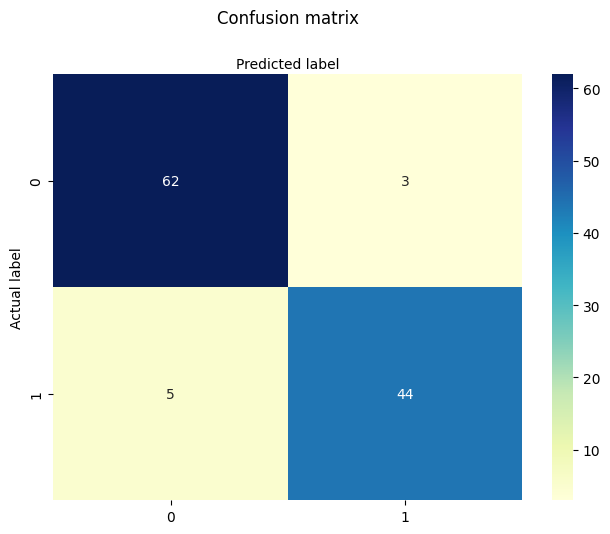

In [65]:
# Run Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train_2_orig, y_train_2)

# Make predictions
y_pred_2 = model.predict(X_val_2_orig)
print("Predictions:\n", y_pred_2)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val_2, y_pred_2)
print("Confusion matrix:\n", cnf_matrix)

# Find accuracy, precision, recall and F1 score
precision = metrics.precision_score(y_val_2, y_pred_2, pos_label='M')
recall = metrics.recall_score(y_val_2, y_pred_2, pos_label='M')
print("Accuracy:", metrics.accuracy_score(y_val_2, y_pred_2))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", (2*precision*recall)/(precision+recall))

# Confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 4: logistic regresion with PCA extraction**



In [66]:
K = range(1, 29)
for k in K:
    print("\nK =", k)
    pca = PCA(n_components=k)
    X_train_pc = pd.DataFrame(data = pca.fit_transform(X_train_2))
    X_val_pc = pca.transform(X_val_2)

    # Run logistic regression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train_pc, y_train_2)

    # Make predictions
    y_pred_2 = classifier.predict(X_val_pc)
    #print("Predictions:\n", y_pred_2)

    # Get confusion matrix
    cnf_matrix = confusion_matrix(y_val_2, y_pred_2)
    print("Confusion matrix:\n", cnf_matrix)

    # Find accuracy, precision, recall and F1 score
    precision = metrics.precision_score(y_val_2, y_pred_2, pos_label='M')
    recall = metrics.recall_score(y_val_2, y_pred_2, pos_label='M')
    print("Accuracy:", metrics.accuracy_score(y_val_2, y_pred_2))
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", (2*precision*recall)/(precision+recall))


K = 1
Confusion matrix:
 [[64  1]
 [ 9 40]]
Accuracy: 0.9122807017543859
Precision: 0.975609756097561
Recall: 0.8163265306122449
F1 Score: 0.888888888888889

K = 2
Confusion matrix:
 [[65  0]
 [ 7 42]]
Accuracy: 0.9385964912280702
Precision: 1.0
Recall: 0.8571428571428571
F1 Score: 0.923076923076923

K = 3
Confusion matrix:
 [[65  0]
 [ 6 43]]
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.8775510204081632
F1 Score: 0.9347826086956522

K = 4
Confusion matrix:
 [[65  0]
 [ 6 43]]
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.8775510204081632
F1 Score: 0.9347826086956522

K = 5
Confusion matrix:
 [[65  0]
 [ 5 44]]
Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8979591836734694
F1 Score: 0.9462365591397849

K = 6
Confusion matrix:
 [[65  0]
 [ 6 43]]
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.8775510204081632
F1 Score: 0.9347826086956522

K = 7
Confusion matrix:
 [[65  0]
 [ 6 43]]
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.8775510204081632
F1 

# **Problem 5: Bayes classifier with PCA extraction**


K = 1
Confusion matrix:
 [[62  3]
 [ 4 45]]
Accuracy: 0.9385964912280702
Precision: 0.9375
Recall: 0.9183673469387755
F1 Score: 0.9278350515463918

K = 2
Confusion matrix:
 [[62  3]
 [ 8 41]]
Accuracy: 0.9035087719298246
Precision: 0.9318181818181818
Recall: 0.8367346938775511
F1 Score: 0.8817204301075268

K = 3
Confusion matrix:
 [[60  5]
 [ 7 42]]
Accuracy: 0.8947368421052632
Precision: 0.8936170212765957
Recall: 0.8571428571428571
F1 Score: 0.875

K = 4
Confusion matrix:
 [[61  4]
 [ 5 44]]
Accuracy: 0.9210526315789473
Precision: 0.9166666666666666
Recall: 0.8979591836734694
F1 Score: 0.9072164948453607

K = 5
Confusion matrix:
 [[61  4]
 [ 6 43]]
Accuracy: 0.9122807017543859
Precision: 0.9148936170212766
Recall: 0.8775510204081632
F1 Score: 0.8958333333333333

K = 6
Confusion matrix:
 [[61  4]
 [ 6 43]]
Accuracy: 0.9122807017543859
Precision: 0.9148936170212766
Recall: 0.8775510204081632
F1 Score: 0.8958333333333333

K = 7
Confusion matrix:
 [[61  4]
 [ 6 43]]
Accuracy: 0.91228070

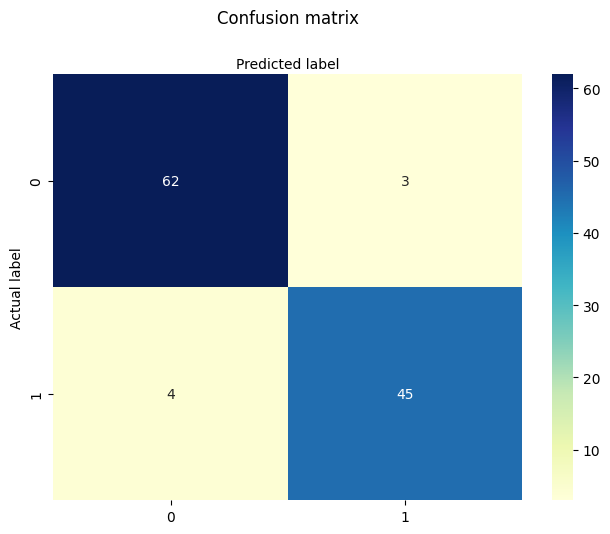

In [67]:
K = range(1, 29)
for k in K:
    print("\nK =", k)
    pca = PCA(n_components=k)
    X_train_pc = pd.DataFrame(data = pca.fit_transform(X_train_2_orig))
    X_val_pc = pca.transform(X_val_2_orig)

    # Run Gaussian Naive Bayes
    model = GaussianNB()
    model.fit(X_train_pc, y_train_2)

    # Make predictions
    y_pred_2 = model.predict(X_val_pc)
    #print("Predictions:\n", y_pred_2)

    # Get confusion matrix
    cnf_matrix = confusion_matrix(y_val_2, y_pred_2)
    print("Confusion matrix:\n", cnf_matrix)

    # Find accuracy, precision, recall and F1 score
    precision = metrics.precision_score(y_val_2, y_pred_2, pos_label='M')
    recall = metrics.recall_score(y_val_2, y_pred_2, pos_label='M')
    print("Accuracy:", metrics.accuracy_score(y_val_2, y_pred_2))
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", (2*precision*recall)/(precision+recall))

    if k == 1:
        # Confusion matrix for best results using heatmap
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')